<a href="https://colab.research.google.com/github/nabilaaaa24/data_mining/blob/main/Praktikum_Modul_4_Kegiatan-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import zipfile

In [23]:
zip_path = '/content/drive/MyDrive/Dataset_daun.zip'
extr_dir = '/content/drive/MyDrive/ExtractedData_Daun'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extr_dir)

print("Zip file extracted successfully.")

Zip file extracted successfully.


Ganti working directory

In [24]:
%cd /content/drive/MyDrive/ExtractedData_Daun

/content/drive/MyDrive/ExtractedData_Daun


In [25]:
! pwd

/content/drive/MyDrive/ExtractedData_Daun


## Load Dataset

In [26]:
imagePaths = 'Dataset_daun/'
label_list = ['Pepaya', 'Nangka']
data = []
labels = []

In [27]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
        print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

Dataset_daun/Pepaya/001.jpg
Dataset_daun/Pepaya/002.jpg
Dataset_daun/Pepaya/003.jpg
Dataset_daun/Pepaya/004.jpg
Dataset_daun/Pepaya/005.jpg
Dataset_daun/Pepaya/006.jpg
Dataset_daun/Pepaya/007.jpg
Dataset_daun/Pepaya/008.jpg
Dataset_daun/Pepaya/009.jpg
Dataset_daun/Pepaya/010.jpg
Dataset_daun/Pepaya/011.jpg
Dataset_daun/Pepaya/012.jpg
Dataset_daun/Pepaya/013.jpg
Dataset_daun/Pepaya/014.jpg
Dataset_daun/Pepaya/015.jpg
Dataset_daun/Pepaya/016.jpg
Dataset_daun/Pepaya/017.jpg
Dataset_daun/Pepaya/018.jpg
Dataset_daun/Pepaya/019.jpg
Dataset_daun/Pepaya/020.jpg
Dataset_daun/Pepaya/021.jpg
Dataset_daun/Pepaya/022.jpg
Dataset_daun/Pepaya/023.jpg
Dataset_daun/Pepaya/024.jpg
Dataset_daun/Pepaya/025.jpg
Dataset_daun/Pepaya/026.jpg
Dataset_daun/Pepaya/027.jpg
Dataset_daun/Pepaya/028.jpg
Dataset_daun/Pepaya/029.jpg
Dataset_daun/Pepaya/030.jpg
Dataset_daun/Pepaya/031.jpg
Dataset_daun/Pepaya/032.jpg
Dataset_daun/Pepaya/033.jpg
Dataset_daun/Pepaya/034.jpg
Dataset_daun/Pepaya/035.jpg
Dataset_daun/Pepaya/

In [28]:
np.array(data).shape

(340, 32, 32, 3)

## Feature Extraction

In [29]:
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [30]:
print(labels)

['Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepa

In [31]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


## Split Dataset

In [32]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (272, 32, 32, 3)
Ukuran data test = (68, 32, 32, 3)


## Bangun Model

In [33]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_8 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4197377 (16.01 MB)
Trainable params: 4197377 (16.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# menentukan hyperparameter
lr = 0.01
max_epochs = 20
opt_funct = SGD(learning_rate=lr)

In [35]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy',
              optimizer = opt_funct,
              metrics = ['accuracy'])

## model ANN dengan Data Train

In [36]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
          epochs=max_epochs, batch_size=32)

Epoch 1/20
9/9 [==============================] - 1s 90ms/step - loss: 0.7640 - accuracy: 0.5662 - val_loss: 0.9982 - val_accuracy: 0.5294
Epoch 2/20
9/9 [==============================] - 0s 37ms/step - loss: 0.6130 - accuracy: 0.6912 - val_loss: 0.5436 - val_accuracy: 0.6912
Epoch 3/20
9/9 [==============================] - 0s 41ms/step - loss: 0.5043 - accuracy: 0.7500 - val_loss: 0.5053 - val_accuracy: 0.7353
Epoch 4/20
9/9 [==============================] - 0s 33ms/step - loss: 0.4502 - accuracy: 0.8015 - val_loss: 0.5421 - val_accuracy: 0.7353
Epoch 5/20
9/9 [==============================] - 0s 37ms/step - loss: 0.5035 - accuracy: 0.7500 - val_loss: 0.9084 - val_accuracy: 0.5882
Epoch 6/20
9/9 [==============================] - 0s 32ms/step - loss: 0.4947 - accuracy: 0.7426 - val_loss: 0.5607 - val_accuracy: 0.6765
Epoch 7/20
9/9 [==============================] - 0s 38ms/step - loss: 0.4512 - accuracy: 0.7757 - val_loss: 0.6424 - val_accuracy: 0.6176
Epoch 8/20
9/9 [===========

## Evaluasi Model

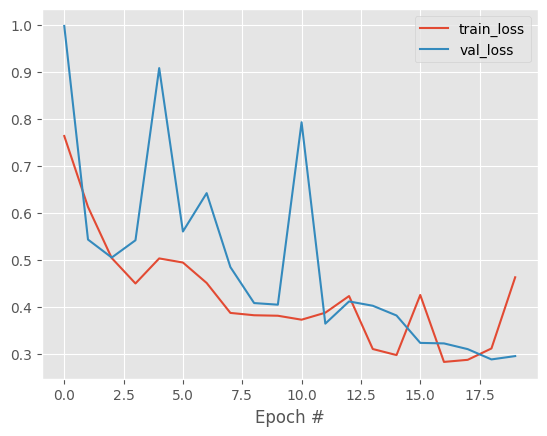

In [37]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

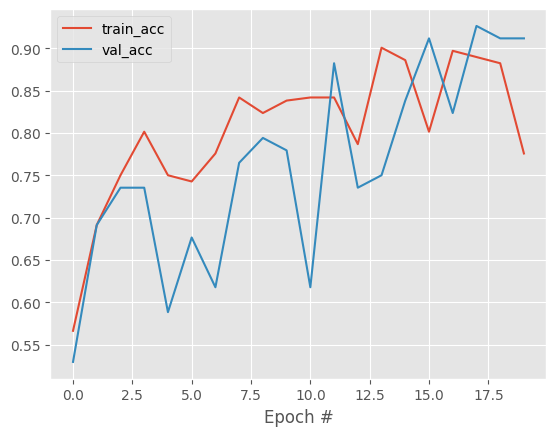

In [38]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [39]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(int)
print(classification_report(y_test, target, target_names=label_list))

3/3 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

      Pepaya       0.91      0.91      0.91        32
      Nangka       0.92      0.92      0.92        36

    accuracy                           0.91        68
   macro avg       0.91      0.91      0.91        68
weighted avg       0.91      0.91      0.91        68



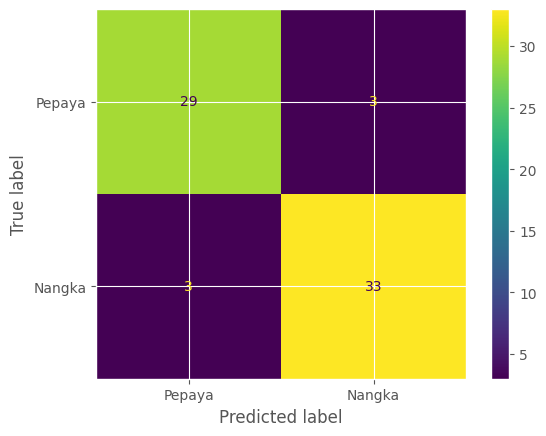

In [40]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, target)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = label_list)

cm_display.plot()
plt.show()